<a href="https://colab.research.google.com/github/TejasKashyap7/TAI-IP/blob/main/sentimentAnalysisTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_csv('demonetization-tweets.csv',encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23/11/16 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23/11/16 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23/11/16 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23/11/16 18:39,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23/11/16 18:39,False,NaN,8.014950e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [ ]:
random_text= data['text'][3]#3 value of text
print(random_text)

RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9


Download NLTK

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizing the sentence by using NLTK function word_tokenize

In [ ]:
tokenizedSentence =  nltk.word_tokenize(random_text)
print(tokenizedSentence[:7]) # First 7 tokenized parts of the random text

['RT', '@', 'ANI_news', ':', 'Gurugram', '(', 'Haryana']


 ***POS Tagging ***

 Now we will do pos tagging , to describe it in my words it simply taggs each token on basis of nouns, verbs, adjectives, and adverbs.

In [ ]:
nltk.download('averaged_perceptron_tagger')# For downloading pos_tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
posTag = nltk.pos_tag(tokenizedSentence)
print(posTag[:7])

[('RT', 'NNP'), ('@', 'NNP'), ('ANI_news', 'NNP'), (':', ':'), ('Gurugram', 'NNP'), ('(', '('), ('Haryana', 'NNP')]


**Chunk**

Here we will chunk same tagg words together with each other

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
chunkedTokenizedRandomText= nltk.chunk.ne_chunk(posTag)
print(chunkedTokenizedRandomText)

(S
  RT/NNP
  @/NNP
  ANI_news/NNP
  :/:
  Gurugram/NNP
  (/(
  (ORGANIZATION Haryana/NNP)
  )/)
  :/:
  Post/NN
  office/NN
  employees/NNS
  provide/VBP
  cash/NN
  exchange/NN
  to/TO
  patients/NNS
  in/IN
  hospitals/NNS
  #/#
  demonetization/NN
  https/NN
  :/:
  //t.co/uGMxUP9/NN)


***SCORE***

Here we will be using VADER to score the words and to remove words which don't have any sentiment like and ,the

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
socreAnalizer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
socreAnalizer.polarity_scores(random_text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

***Running on dataset we have***

for this we will be using tqdm , we will loop throught the data by using iterrows and we will use a index row of dataset and text row index to insert value in dictionary by telling index and text for analysis and then store it to a dictionary


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
data.head()
data.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

now we will find which row to be used for index

In [ ]:
data.isna().sum()
unique=len(set('X')) == len('X')
print(unique)
# to checque if all values are unique or not

True


Now to run on entire dataset

In [ ]:

results ={}
for i, row in tqdm(data.iterrows(), total=len(data)):
  text = row[ 'text' ]
  myid = row[ 'X']
  results[myid] = socreAnalizer.polarity_scores (text)


  0%|          | 0/14940 [00:00<?, ?it/s]

Now we check the result Dictionary

In [ ]:
print(results)

{1: {'neg': 0.1, 'neu': 0.783, 'pos': 0.117, 'compound': 0.1027}, 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 7: {'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.6249}, 8: {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3818}, 9: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}, 10: {'neg': 0.155, 'neu': 0.728, 'pos': 0.117, 'compound': -0.2023}, 11: {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.8176}, 12: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4019}, 13: {'neg': 0.177, 'neu': 0.672, 'pos': 0.151, 'compound': -0.1179}, 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 16: {'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.6997

**converting results into data frame**

NOW we got sentiments of our data in a dictionary to work on this data we will simply convert this data into a dataFrame. Here T is used to tranforme the matrix other wise it will show matrix on basis of neg ,neu ,pos,compund

In [ ]:
framedResults=pd.DataFrame(results).T
framedResults

,neg,neu,pos,compound
1,0.100,0.783,0.117,0.1027
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
14936,0.141,0.859,0.000,-0.3182
14937,0.220,0.664,0.116,-0.3612
14938,0.156,0.496,0.347,0.4588
14939,0.000,0.849,0.151,0.5499


Now merging our results with the data we had in beginning

In [ ]:
print(data.columns)
framedResults['X'] = framedResults.index
mergedFramedResults = framedResults.join(data, on='X', how='left', lsuffix='_framedResults', rsuffix='_data')
mergedFramedResults.head()

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')


,neg,neu,pos,compound,X_framedResults,index,Unnamed: 0,X_data,text,favorited,...,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
1,0.1,0.783,0.117,0.1027,1,1,2.0,2.0,RT @Hemant_80: Did you vote on #Demonetization...,False,...,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,0.0,1.000,0.000,0.0000,2,2,3.0,3.0,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,...,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,0.0,1.000,0.000,0.0000,3,3,4.0,4.0,RT @ANI_news: Gurugram (Haryana): Post office ...,False,...,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,0.0,1.000,0.000,0.0000,4,4,5.0,5.0,RT @satishacharya: Reddy Wedding! @mail_today ...,False,...,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False
5,0.0,1.000,0.000,0.0000,5,5,6.0,6.0,@DerekScissors1: Indias #demonetization: #Bla...,False,...,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0.0,False,False


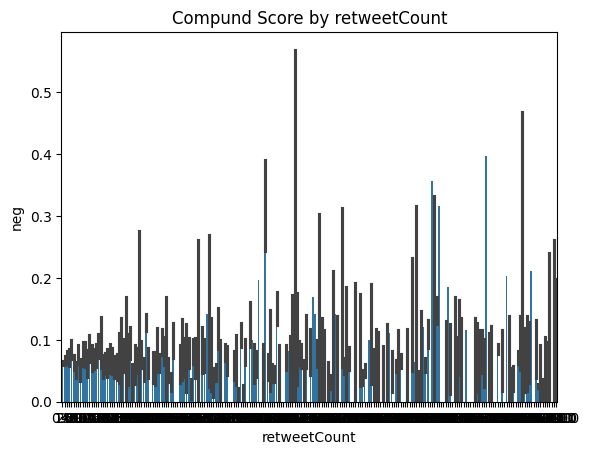

In [ ]:
import seaborn
import matplotlib.pyplot as plt


ax = seaborn.barplot(data=mergedFramedResults,x= 'retweetCount', y= 'neg' )
ax.set_title( 'Compund Score by retweetCount')
plt. show()

there is no clear relation between retweet and compund

In [ ]:
positive_threshold = 0.05
negative_threshold = -0.05

mergedFramedResults['sentiment'] = mergedFramedResults['compound'].apply(lambda x: 'positive' if x > positive_threshold else ('negative' if x < negative_threshold else 'neutral'))
mergedFramedResults.head()

,neg,neu,pos,compound,X_framedResults,index,Unnamed: 0,X_data,text,favorited,...,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment
1,0.1,0.783,0.117,0.1027,1,1,2.0,2.0,RT @Hemant_80: Did you vote on #Demonetization...,False,...,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False,positive
2,0.0,1.000,0.000,0.0000,2,2,3.0,3.0,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,...,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False,neutral
3,0.0,1.000,0.000,0.0000,3,3,4.0,4.0,RT @ANI_news: Gurugram (Haryana): Post office ...,False,...,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False,neutral
4,0.0,1.000,0.000,0.0000,4,4,5.0,5.0,RT @satishacharya: Reddy Wedding! @mail_today ...,False,...,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False,neutral
5,0.0,1.000,0.000,0.0000,5,5,6.0,6.0,@DerekScissors1: Indias #demonetization: #Bla...,False,...,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0.0,False,False,neutral


counting how many occurence did pos,neg,neutral made

In [ ]:
sentiment_counts = mergedFramedResults['sentiment'].value_counts()

Plotting that data


This graph shows us the diffrence between the emotions of people on this topic.

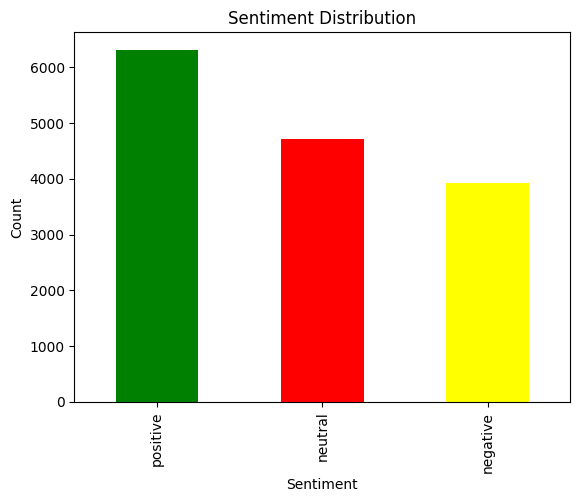

In [ ]:
sentiment_counts.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

 ***'Sentiment' VS 'time of the day'***

 In this graph we will see which kind of tweets are retweeted most here.

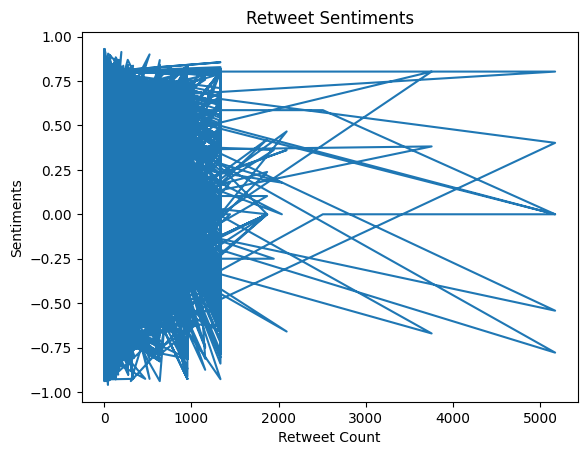

In [ ]:
plt.plot(mergedFramedResults['retweetCount'], mergedFramedResults['compound'])
plt.xlabel("Retweet Count")
plt.ylabel("Sentiments")
plt.title("Retweet Sentiments")
plt.show()